<a href="https://colab.research.google.com/github/parvekarsakshi09/ML-practicals/blob/main/k_means_clusturing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("sakshi parvekar")

sakshi parvekar


# K means Clusturing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly as py
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import os
from sklearn.preprocessing import StandardScaler


### Read csv file

In [ ]:
df = pd.read_csv("C:\dataset\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### EDA

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
X = df

y = df['Gender']

### Encode categorical variable 'Gender' to numerical

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['Gender'] = le.fit_transform(X['Gender'])

y = le.transform(y)

### Standardize the features

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Visualize the correlation matrix

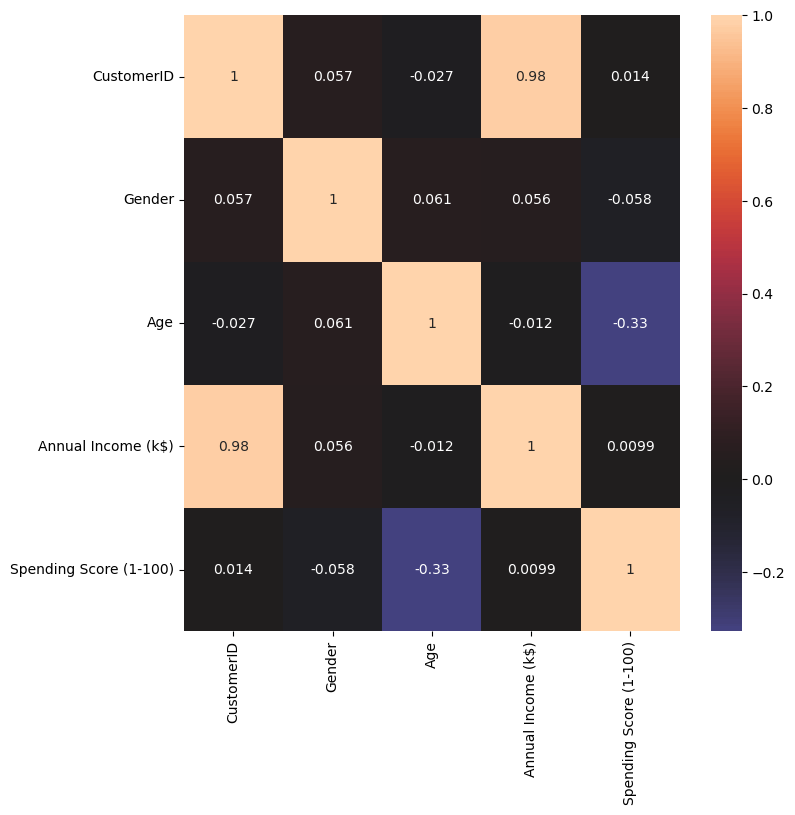

In [ ]:
numeric_data = df.select_dtypes(include=['number'])
corrmat= numeric_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corrmat,annot=True, center=0)
plt.show()


In [ ]:
import os
os.environ['OMP_NUM_THREADS'] = '1'


### Determine the optimal number of clusters using the Elbow Method

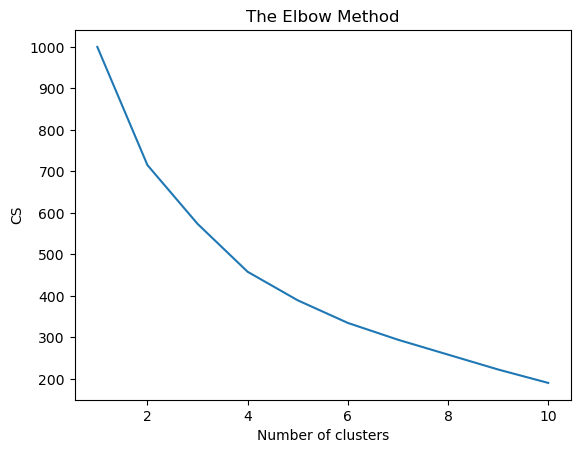

In [ ]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()


### Perform K-Means clustering with different numbers of clusters

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

C:\Users\NetComm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Result: 107 out of 200 samples were correctly labeled.
Accuracy score: 0.54


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

C:\Users\NetComm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Result: 70 out of 200 samples were correctly labeled.
Accuracy score: 0.35


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

C:\Users\NetComm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Result: 46 out of 200 samples were correctly labeled.
Accuracy score: 0.23


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)

kmeans.fit(X)

# check how many of the samples were cozrrectly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

### Visualize clusters


C:\Users\NetComm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\NetComm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\NetComm\AppData\Local\Temp\ipykernel_22568\2532594935.py:21: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.scatterplot(data=pd.DataFrame(df[["Spending Score (1-100)","Annual Income (k$)"]]), x="Spending Score (1-100)", y="Annual Income (k$)",hue=labels, palette=sns.color_palette(colors))


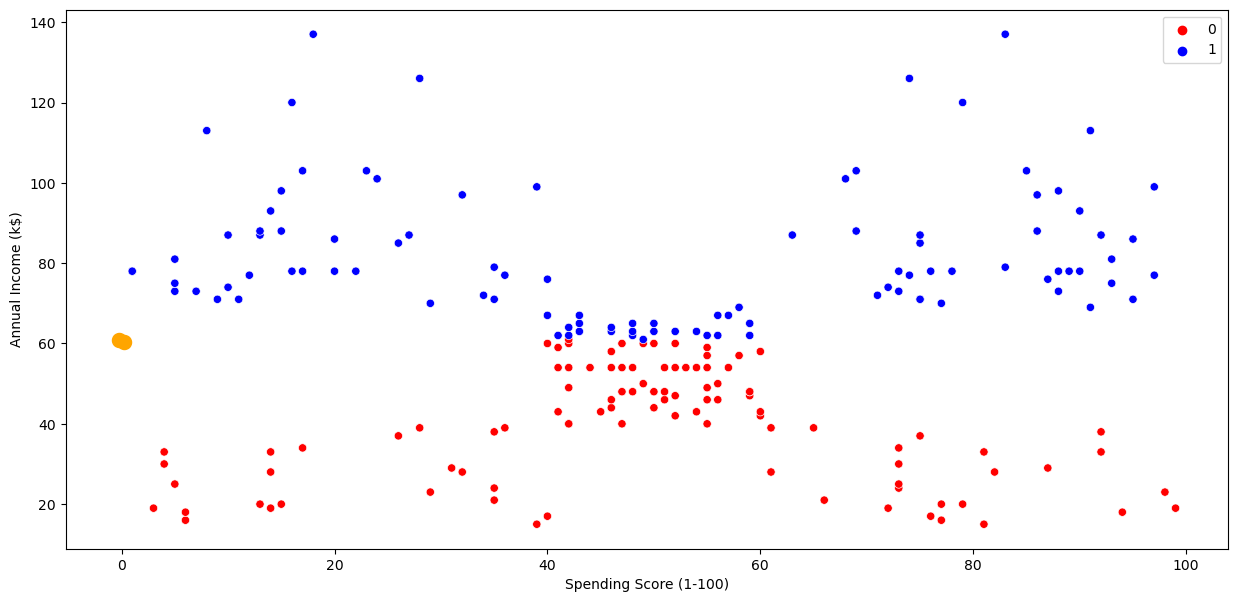

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0)


kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

sc = StandardScaler()
df["Annual Income (k$)"]=sc.fit_transform(df[["Annual Income (k$)"]])
km = KMeans(n_clusters=2)
y = km.fit_predict(X_scaled)
centroids = km.cluster_centers_
centroids_x = centroids[:,2]
centroids_y = centroids[:,4]

centroids_y=sc.inverse_transform(centroids_y.reshape(1,-1))
df["Annual Income (k$)"] = sc.inverse_transform(df[["Annual Income (k$)"]])
colors=["#FF0000","#0000FF","#00FF00","#00BEEE","#FFAABC","#FFBCDA"]
plt.figure(figsize=(15,7))
sns.scatterplot(data=pd.DataFrame(df[["Spending Score (1-100)","Annual Income (k$)"]]), x="Spending Score (1-100)", y="Annual Income (k$)",hue=labels, palette=sns.color_palette(colors))
plt.scatter(x=centroids_x, y=centroids_y, marker=".", s=150, linewidths=5, zorder=10, c="Orange")
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.show()



### Calculating silhouette_score

In [ ]:
silhouette_avg = silhouette_score(X, y)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.4658160687519246
